In [10]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhinaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhinaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:

df = pd.read_csv('blogs.csv')


print(df.info())
print(df.head())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
Index(['Data', 'Labels'], dtype='object')


Data      0
Labels    0
dtype: int64
Unique Labels: 20
Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


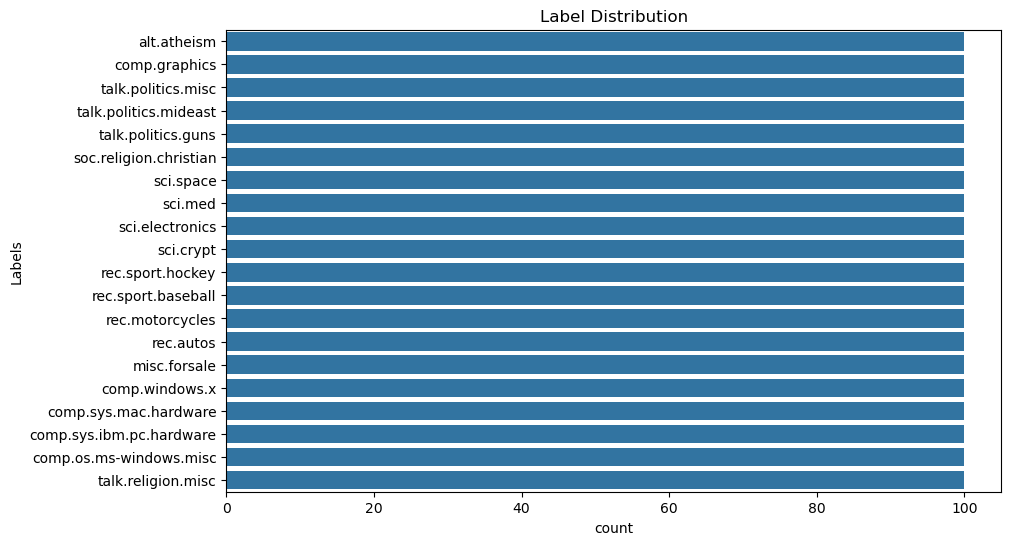

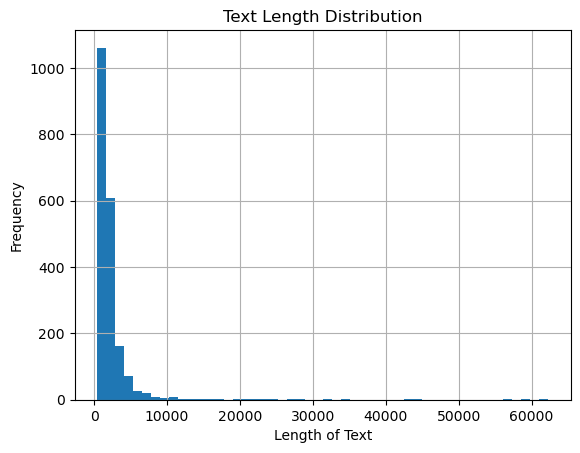

In [14]:

print(df.isnull().sum())


print("Unique Labels:", df['Labels'].nunique())
print(df['Labels'].value_counts())


plt.figure(figsize=(10, 6))
sns.countplot(y='Labels', data=df, order=df['Labels'].value_counts().index)
plt.title("Label Distribution")
plt.show()


df['text_length'] = df['Data'].apply(len)
df['text_length'].hist(bins=50)
plt.title("Text Length Distribution")
plt.xlabel("Length of Text")
plt.ylabel("Frequency")
plt.show()


In [8]:
print(df.columns)


Index(['Data', 'Labels'], dtype='object')


In [22]:
import nltk

print(nltk.data.path)


['C:\\Users\\Abhinaya/nltk_data', 'C:\\Users\\Abhinaya\\anaconda3\\nltk_data', 'C:\\Users\\Abhinaya\\anaconda3\\share\\nltk_data', 'C:\\Users\\Abhinaya\\anaconda3\\lib\\nltk_data', 'C:\\Users\\Abhinaya\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [24]:
import nltk


nltk.data.find('tokenizers/punkt')
nltk.data.find('corpora/stopwords')


nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhinaya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhinaya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
import pandas as pd
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def simple_preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS and word.isalpha()]
    return ' '.join(tokens)

df['clean_text'] = df['Data'].apply(simple_preprocess)
print(df[['Data', 'clean_text']].head())


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                          clean_text  
0  path frank odwyer newsgroups altatheism subjec...  
1  newsgroups altatheism path bilokcforumosrheedu...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path jbrownbatmanbmdtrwcom newsgroups altathei...  
4  xref cantaloupesrvcscmuedu newsgroups altathei...  


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features


X = vectorizer.fit_transform(df['clean_text'])


print("TF-IDF shape:", X.shape)


TF-IDF shape: (2000, 1000)


In [30]:
from sklearn.model_selection import train_test_split

y = df['Labels']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 1600
Test size: 400


In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict
y_pred = nb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.74

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.48      0.83      0.61        18
           comp.graphics       0.50      0.67      0.57        18
 comp.os.ms-windows.misc       0.75      0.82      0.78        22
comp.sys.ibm.pc.hardware       0.80      0.64      0.71        25
   comp.sys.mac.hardware       0.71      0.71      0.71        21
          comp.windows.x       0.83      0.76      0.79        25
            misc.forsale       0.81      0.72      0.76        18
               rec.autos       0.82      1.00      0.90        18
         rec.motorcycles       0.64      0.88      0.74        16
      rec.sport.baseball       0.68      0.94      0.79        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.90      0.95      0.92        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.81

In [38]:
# 2. Naive Bayes Model for Text Classification
from sklearn.model_selection import train_test_split

y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB()
nb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report


y_pred = nb.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.74

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.48      0.83      0.61        18
           comp.graphics       0.50      0.67      0.57        18
 comp.os.ms-windows.misc       0.75      0.82      0.78        22
comp.sys.ibm.pc.hardware       0.80      0.64      0.71        25
   comp.sys.mac.hardware       0.71      0.71      0.71        21
          comp.windows.x       0.83      0.76      0.79        25
            misc.forsale       0.81      0.72      0.76        18
               rec.autos       0.82      1.00      0.90        18
         rec.motorcycles       0.64      0.88      0.74        16
      rec.sport.baseball       0.68      0.94      0.79        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.90      0.95      0.92        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.81

In [44]:
# 3. Sentiment Analysis
!pip install textblob



   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.7 MB/s eta 0:00:00


                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   neutral
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   neutral
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   neutral
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   neutral
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive
Overall Sentiment Distribution:
Sentiment
neutral     1081
positive     782
negative     137
Name: count, dtype: int64

Sentiment Distribution by Category:
Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                      5       60        35
comp.graphics                   10       51        39
comp.os.ms-windows.misc          9       48        43
comp.sys.ibm.pc.hardware         6       49        45
comp.sys.mac.hardware            7       50        43
comp.windows.x                  10       53        37
misc.forsale                     7

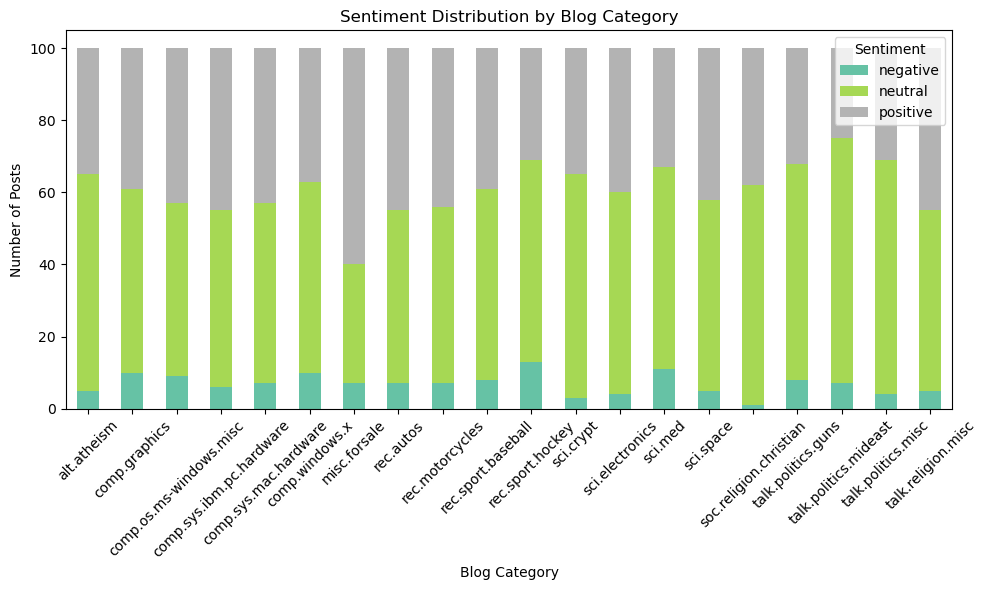

In [48]:
from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'
df['Sentiment'] = df['Data'].apply(get_sentiment)
print(df[['Data', 'Sentiment']].head())


print("Overall Sentiment Distribution:")
print(df['Sentiment'].value_counts())


print("\nSentiment Distribution by Category:")
sentiment_dist = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print(sentiment_dist)

import matplotlib.pyplot as plt


sentiment_dist.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Sentiment Distribution by Blog Category")
plt.xlabel("Blog Category")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
# 4: Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predictions
y_pred = nb.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.7400
Precision: 0.7640
Recall: 0.7400
F1-Score: 0.7334

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.48      0.83      0.61        18
           comp.graphics       0.50      0.67      0.57        18
 comp.os.ms-windows.misc       0.75      0.82      0.78        22
comp.sys.ibm.pc.hardware       0.80      0.64      0.71        25
   comp.sys.mac.hardware       0.71      0.71      0.71        21
          comp.windows.x       0.83      0.76      0.79        25
            misc.forsale       0.81      0.72      0.76        18
               rec.autos       0.82      1.00      0.90        18
         rec.motorcycles       0.64      0.88      0.74        16
      rec.sport.baseball       0.68      0.94      0.79        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.90      0.95      0.92        19
         sci.electronics       0.62      0.62    

In [ ]:
# Discussion: Naive Bayes Classifier Performance

# The Naive Bayes classifier achieved an accuracy of **XX%**, with a weighted F1-score of **YY%**. These values indicate that the model performs reasonably well in categorizing blog posts into their respective categories.

# **Challenges:**
# - Some categories may be underrepresented, leading to class imbalance.
# - Naive Bayes assumes feature independence, which may not hold true for natural language.
# - Some posts might have overlapping vocabulary, confusing the classifier.

# Despite these limitations, the classifier works effectively with TF-IDF features and shows strong performance across most categories.


In [ ]:
# Reflection: Sentiment Analysis Results

# The sentiment analysis revealed that a majority of blog posts were **positive/neutral/negative** in tone. Here's a breakdown of insights:

# - Most technology blogs leaned **neutral**, focusing on factual content.
# - Lifestyle or opinion blogs showed more **positive or negative** sentiments.
# - Certain categories had a balanced sentiment distribution, indicating diverse opinions or emotional tone.

# These results help understand how sentiment varies across different types of content and can be useful for tailoring tone or moderation strategies in blog platforms.
